In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager,rc

font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [20]:
df=pd.read_csv("c:/data/iris/iris2.csv")
print(df.head())

   Sepallength  Sepalwidth  Petallength  Petalwidth    Name  Species
0          5.1         3.5          1.4         0.2  setosa        0
1          4.9         3.0          1.4         0.2  setosa        0
2          4.7         3.2          1.3         0.2  setosa        0
3          4.6         3.1          1.5         0.2  setosa        0
4          5.0         3.6          1.4         0.2  setosa        0


In [21]:
df.columns

Index(['Sepallength', 'Sepalwidth', 'Petallength', 'Petalwidth', 'Name',
       'Species'],
      dtype='object')

In [22]:
df.shape

(150, 6)

In [23]:
df.describe()

,Sepallength,Sepalwidth,Petallength,Petalwidth,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [24]:
df["Name"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [25]:
df.groupby("Name").mean()

,Sepallength,Sepalwidth,Petallength,Petalwidth,Species
Name,,,,,
setosa,5.006,3.428,1.462,0.246,0
versicolor,5.936,2.770,4.260,1.326,1
virginica,6.588,2.974,5.552,2.026,2


Text(0, 0.5, 'Sepalwidth')

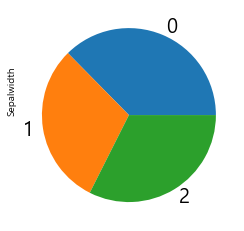

In [26]:
sum_by_species=df.groupby('Species').sum()
var="Sepalwidth"    
sum_by_species[var].plot(kind='pie',fontsize=20)
plt.ylabel(var, horizontalalignment='left')

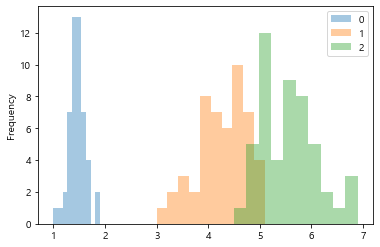

In [27]:
for spec in df['Species'].unique():
    subdf=df[df['Species']==spec]
    subdf['Petallength'].plot(kind='hist', alpha=0.4,label=spec)

plt.legend(loc='upper right')

In [28]:
df["Name"].value_counts()

virginica     50
versicolor    50
setosa        50
Name: Name, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (setosa, 1: versicolor, 2: virginica 분류)')

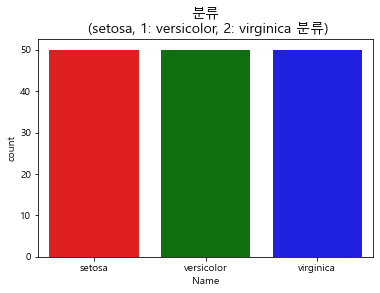

In [29]:
import seaborn as sns

colors=['red','green','blue']

sns.countplot('Name', data=df, palette=colors)
plt.title('분류\n (setosa, 1: versicolor, 2: virginica 분류)', fontsize=14)


In [31]:
cols=['Sepallength', 'Sepalwidth', 'Petallength','Petalwidth']
X=df[cols]
y=df['Species']

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9666666666666667
1.0


In [34]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [35]:
df_cm=pd.DataFrame(cm, index=[0,1,2],
columns=[0,1,2])
df_cm

,0,1,2
0,11,0,0
1,0,13,0
2,0,0,6


<AxesSubplot:title={'center':'Confusion Matrix'}>

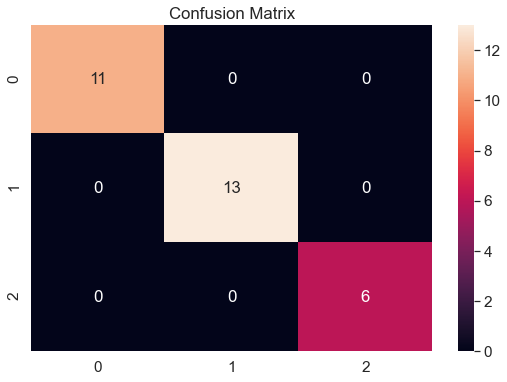

In [43]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)

In [38]:
df.Species.unique()

array([0, 1, 2], dtype=int64)

In [39]:
flowers=['setosa','versicolor','virginca']
X_new=[[7, 3, 5, 1.4]]
pred=model.predict(X_new)
print(flowers[pred[0]])

versicolor


In [40]:
import joblib
joblib.dump(model, 'c:/data/iris/iris_logit.model')

['c:/data/iris/iris_logit.model']

In [41]:
model=joblib.load('c:/data/iris/iris_logit.model')

In [45]:
flowers=['setosa','versicolor','virginca']
X_new=[[7, 3, 5, 1.4],[7.5, 2.5, 3.7, 1.4],[3.7, 8.9, 5, 1.4]]
pred=model.predict(X_new)
print(flowers[pred[0]])
print(flowers[pred[1]])
print(flowers[pred[2]])

versicolor
versicolor
setosa
